In [1]:
%matplotlib inline  
from __init__ import *
import numpy as np
import core.steps as steps
from core import data_store as ds
from core.common.ds_utils import print_ds_items_info
from core.common.file_utils import add_suffix_without_extension
from core.evaluation.retrieval_perfomance import extract_perfomances_from_arr
from core.common.path_helper import DataStoreHelper
import math, os
%load_ext autoreload
%autoreload 2

In [2]:
ds_helper=DataStoreHelper(r'C:\data\computation\brodatz')

# Plot exhaustive search perfomance

In [3]:
def plot_ex_search_perfomance(descriptor_names, perfomance_type, save_to_file=False):
    subplotname__label__x__y = {}
    label__x__y=subplotname__label__x__y.setdefault('',{})
    label__kwargs={}
    for descriptor_name in descriptor_names:
        perfomances_ds = ds_helper.ex_search_perfomances_ds(descriptor_name)
        perfomances_arr=ds_helper.perfomance_arr(perfomances_ds)
        y_arr = extract_perfomances_from_arr(perfomances_arr, perfomance_type)
        label = descriptor_name
        n_nearest_arr = extract_perfomances_from_arr(perfomances_arr, 'n_nearest')
        label__x__y[label]=dict(zip(n_nearest_arr, y_arr))

    if save_to_file:
        plot_path=ds_helper.ex_search_perfomances_plot_path(perfomance_type)
    else:
        plot_path=None
    steps.plotting_step3(subplotname__label__x__y, '', str, 'n_nearest', perfomance_type, save_to_file=plot_path, label__kwargs=label__kwargs)

In [4]:
perfomance_names=['precision', 'recall', 'mAP']

descriptor_names=['histograms', 'glcms','lbphistograms']
choosen_bovwproductbincounts_pq_params= [{'n_clusters': K, 'n_quantizers': m} for K,m in [(64,4),(128,1),(16,1)]]
descriptor_names+=ds_helper.bovw_descriptors_names('bovwproductbincounts',choosen_bovwproductbincounts_pq_params)

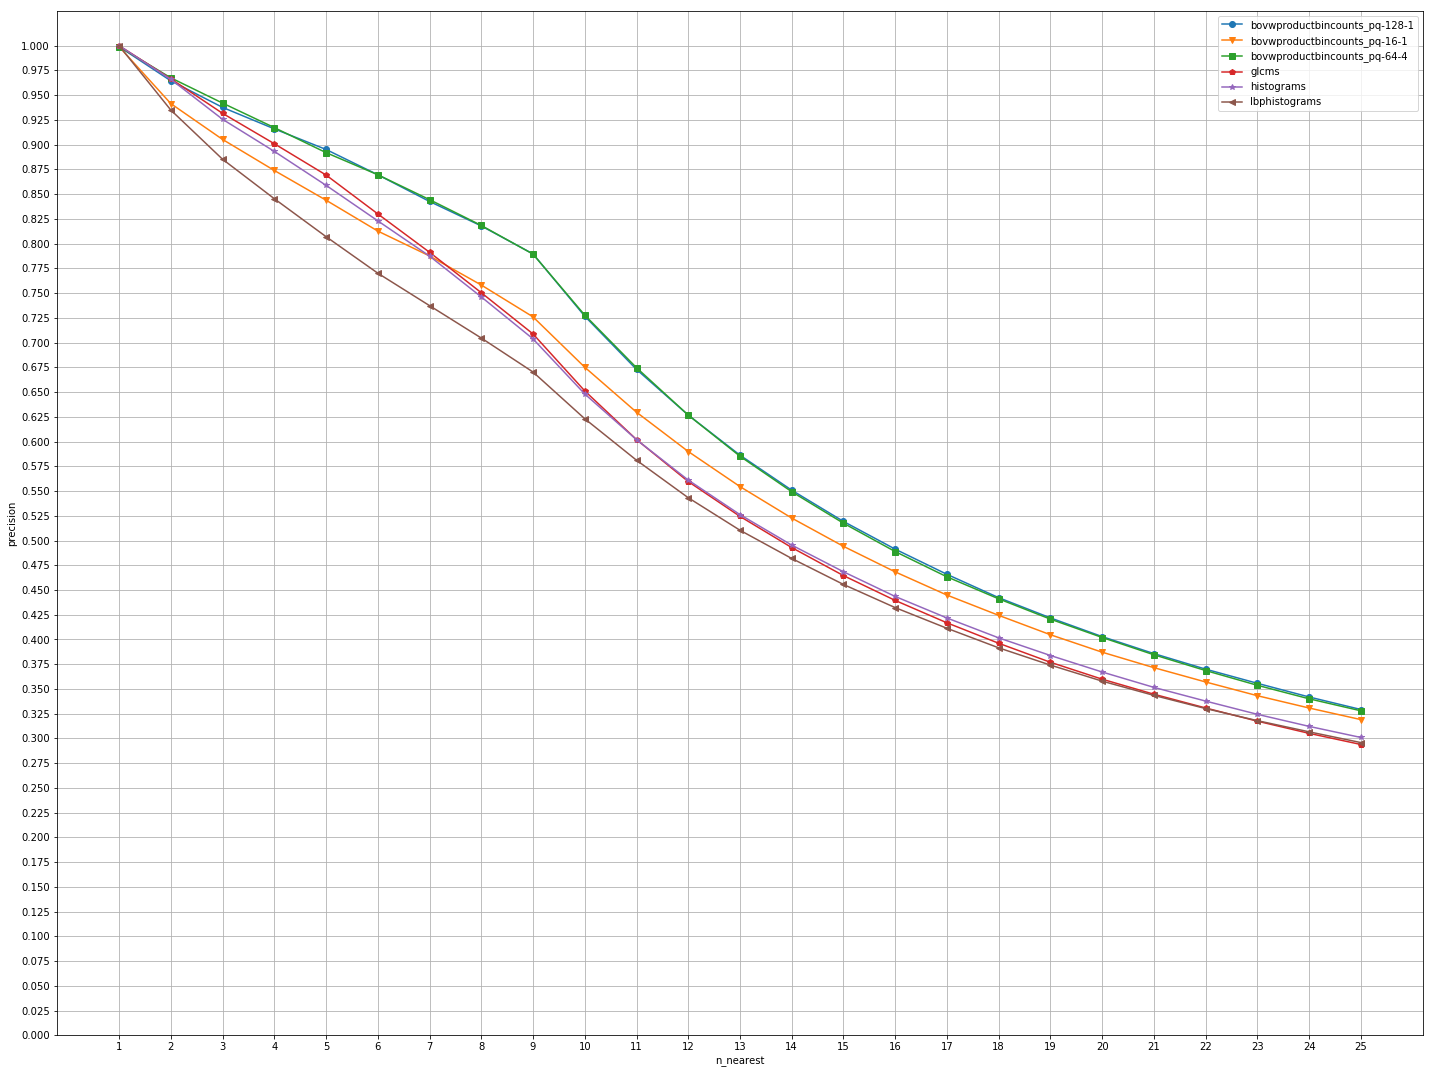

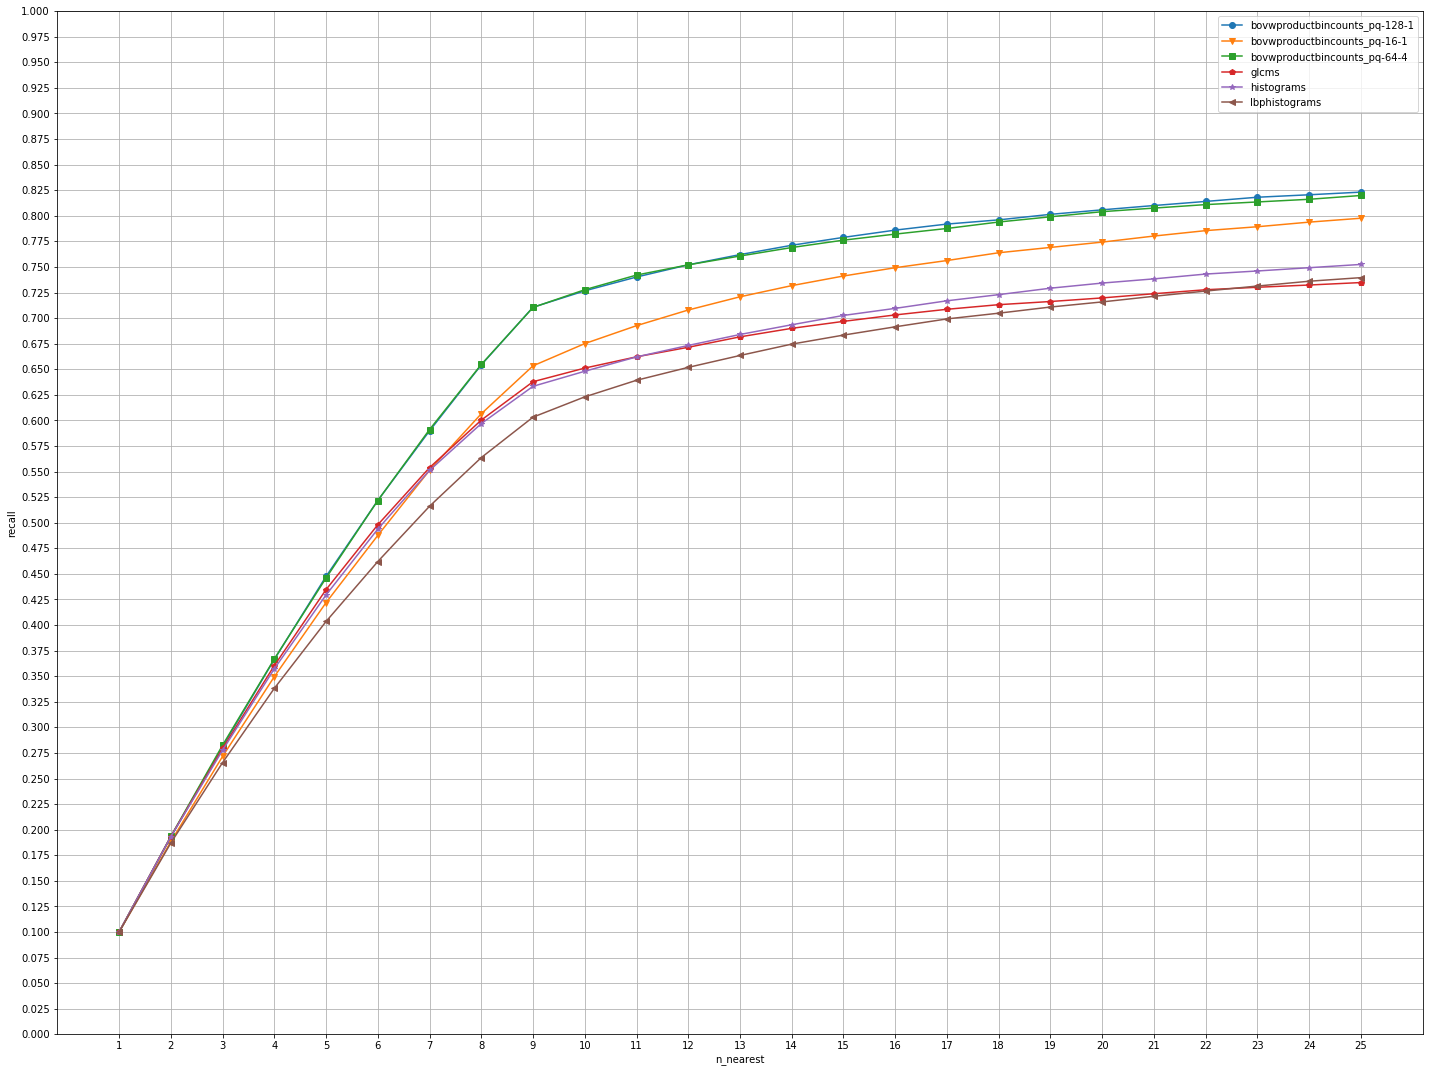

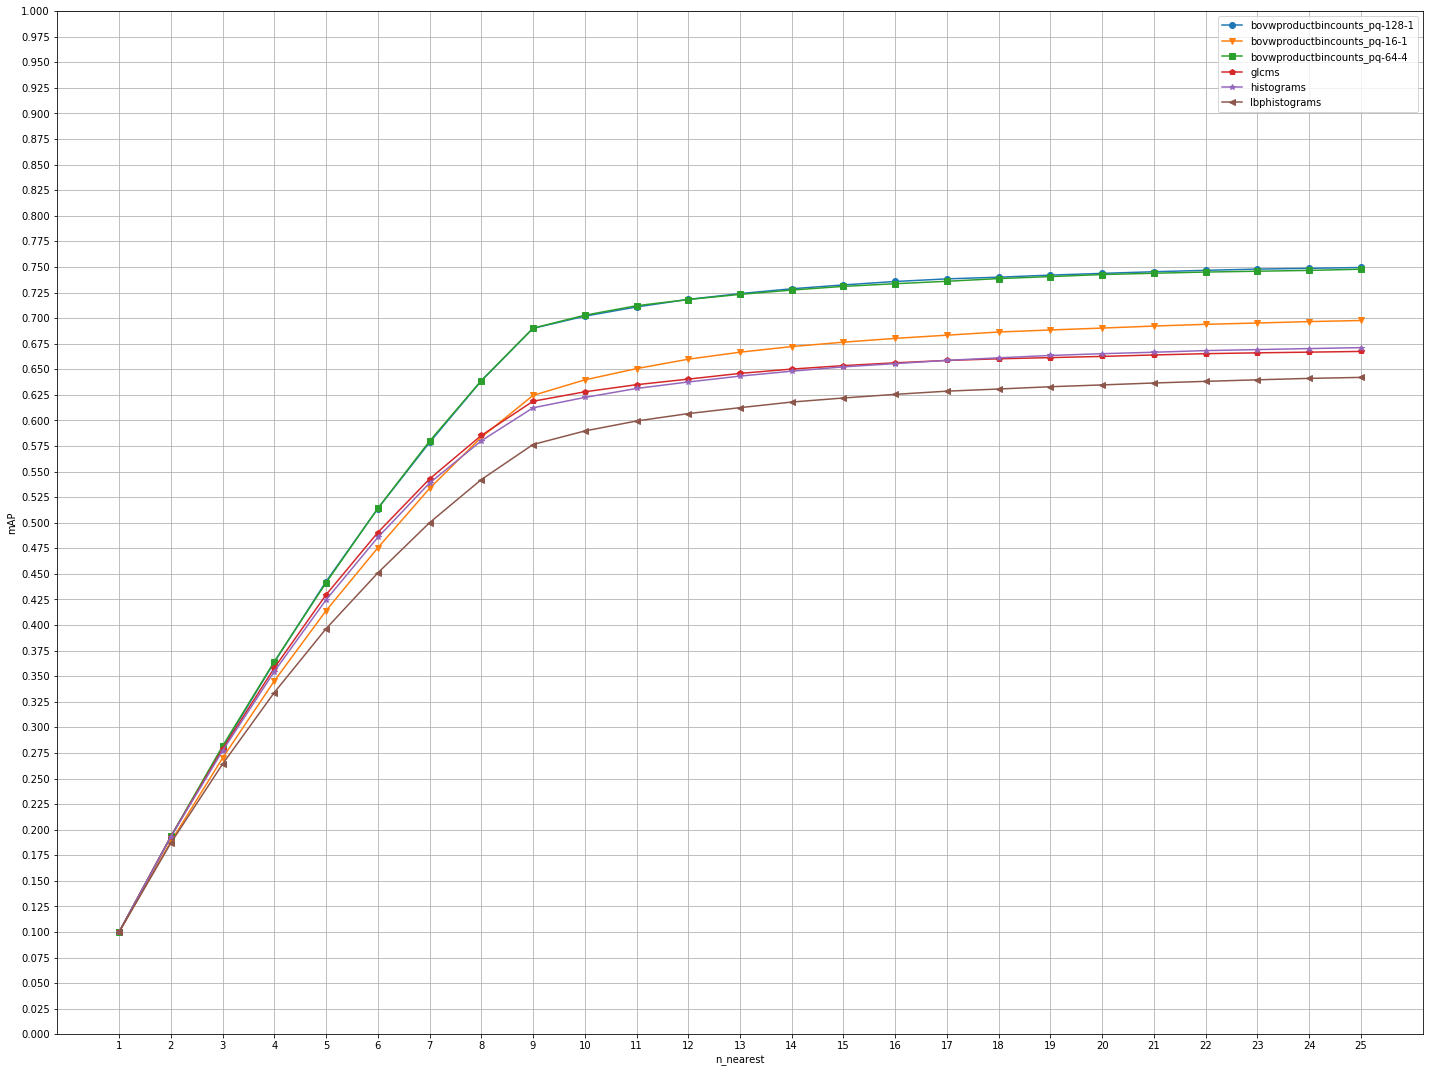

In [6]:
plot_ex_search_perfomance(descriptor_names, 'precision')
plot_ex_search_perfomance(descriptor_names, 'recall')
plot_ex_search_perfomance(descriptor_names, 'mAP')

In [ ]:
for perfomance_name in perfomance_names:
    plot_ex_search_perfomance(descriptor_names, perfomance_name, save_to_file=True)